In [1]:
import numpy as np
from scipy.integrate import odeint
# import matplotlib.pyplot as plt
from matplotlib import pyplot as PLT
import math
import pandas as pd
import seaborn as sns; sns.set()

import sympy as sm

In [5]:
def RSteadyState(N,I):
    return (alpha + c*N) / (b_R - epsilon*a*I)
def NSteadyState(R):
    return (mu + (R/kA)**n) / ((c + c*(R/kA)**n + g + g*(R/kA)**n + beta))                               
def TSteadyState(N,I,R):
    return (-1 * beta * N) / (a*I + a*I*(R/kA)**n - b_T - b_T * (R/kA)**n)
def ISteadyState(T,R):
    return (d*T) / (e_T*T + e_R*R + f)

In [2]:
#function that returns dy/dt
def modelNew(ic,t,co):
    # Initial conditions
    N = ic[0] #N = naive T-cells
    T = ic[1] #T = Activated T-cells
    I = ic[2] #I = IL-2
    R = ic[3] #R = TRegs
    
    # Constant Values
    alpha   = co[0]
    Thy     = co[1]
    Thy_max = co[2]   
    epsilon = co[3]
    a       = co[4]
    c       = co[5]
    b_R     = co[6]
    mu      = co[7]
    beta    = co[8]
    z       = co[9]
    g       = co[10]
    b_T     = co[11]
    d       = co[12]
    e_T     = co[13]
    e_R     = co[14]
    f       = co[15]
    
    #New parameters
    kA      = co[16]
    n       = co[17];
    

    
    dRdt = alpha*(Thy/Thy_max) + epsilon*a*I*R + c*N - b_R*R
    dNdt = mu*(Thy/Thy_max) - beta*N*(1/(1+(R/kA)**n)) - c*N - g*N 
    dTdt = beta*N*(1/(1+(R/kA)**n)) + a*I*T - b_T*T
    dIdt = d*T - e_T*I*T - e_R*I*R - f*I
    
    
    return [dNdt, dTdt, dIdt, dRdt]

In [6]:
############
#  Thymus  #
############
alpha = 0.006 #------------ T Regulatory Cells
mu = 60   #---------- Naive T cells
Thy = 1 #------------ Size of the thymus
Thy_max = 1 #------- Max size of the thymus

#########################################
#  Naive T cell Differentiation Rates   #
#########################################
c = 0.01 #--------To T regulatory Cells
beta = 10 #------ To activated T cells

###########
#  Tregs  #
###########
epsilon = 1 #------------T regulatory cell Self replication
z       = 1 #------- Strength of suppression on Naive T cell differention to activation
n       = 1 #hill coefficient
kA      = 10 #halfSaturationRate 

##############################################
#  IL-2 Cytokine Expression and Consumption  #
##############################################
d = 0.01 #------- T Cell Expression
a = 0.1   #------------Activated T cells
e_T = 0.01 #------ T Cell Consumption Rate
e_R = 0.01 #------ T Reg Consumption Rate

##################
#  Death Rates   #
##################
g = 0.01 #-----------Naive T cells
b_T = 0.1 #-----------Activated T cells
b_R = 0.1 #----------Regulatory T Cells
f = 1 #-------------IL-2 Cytokine

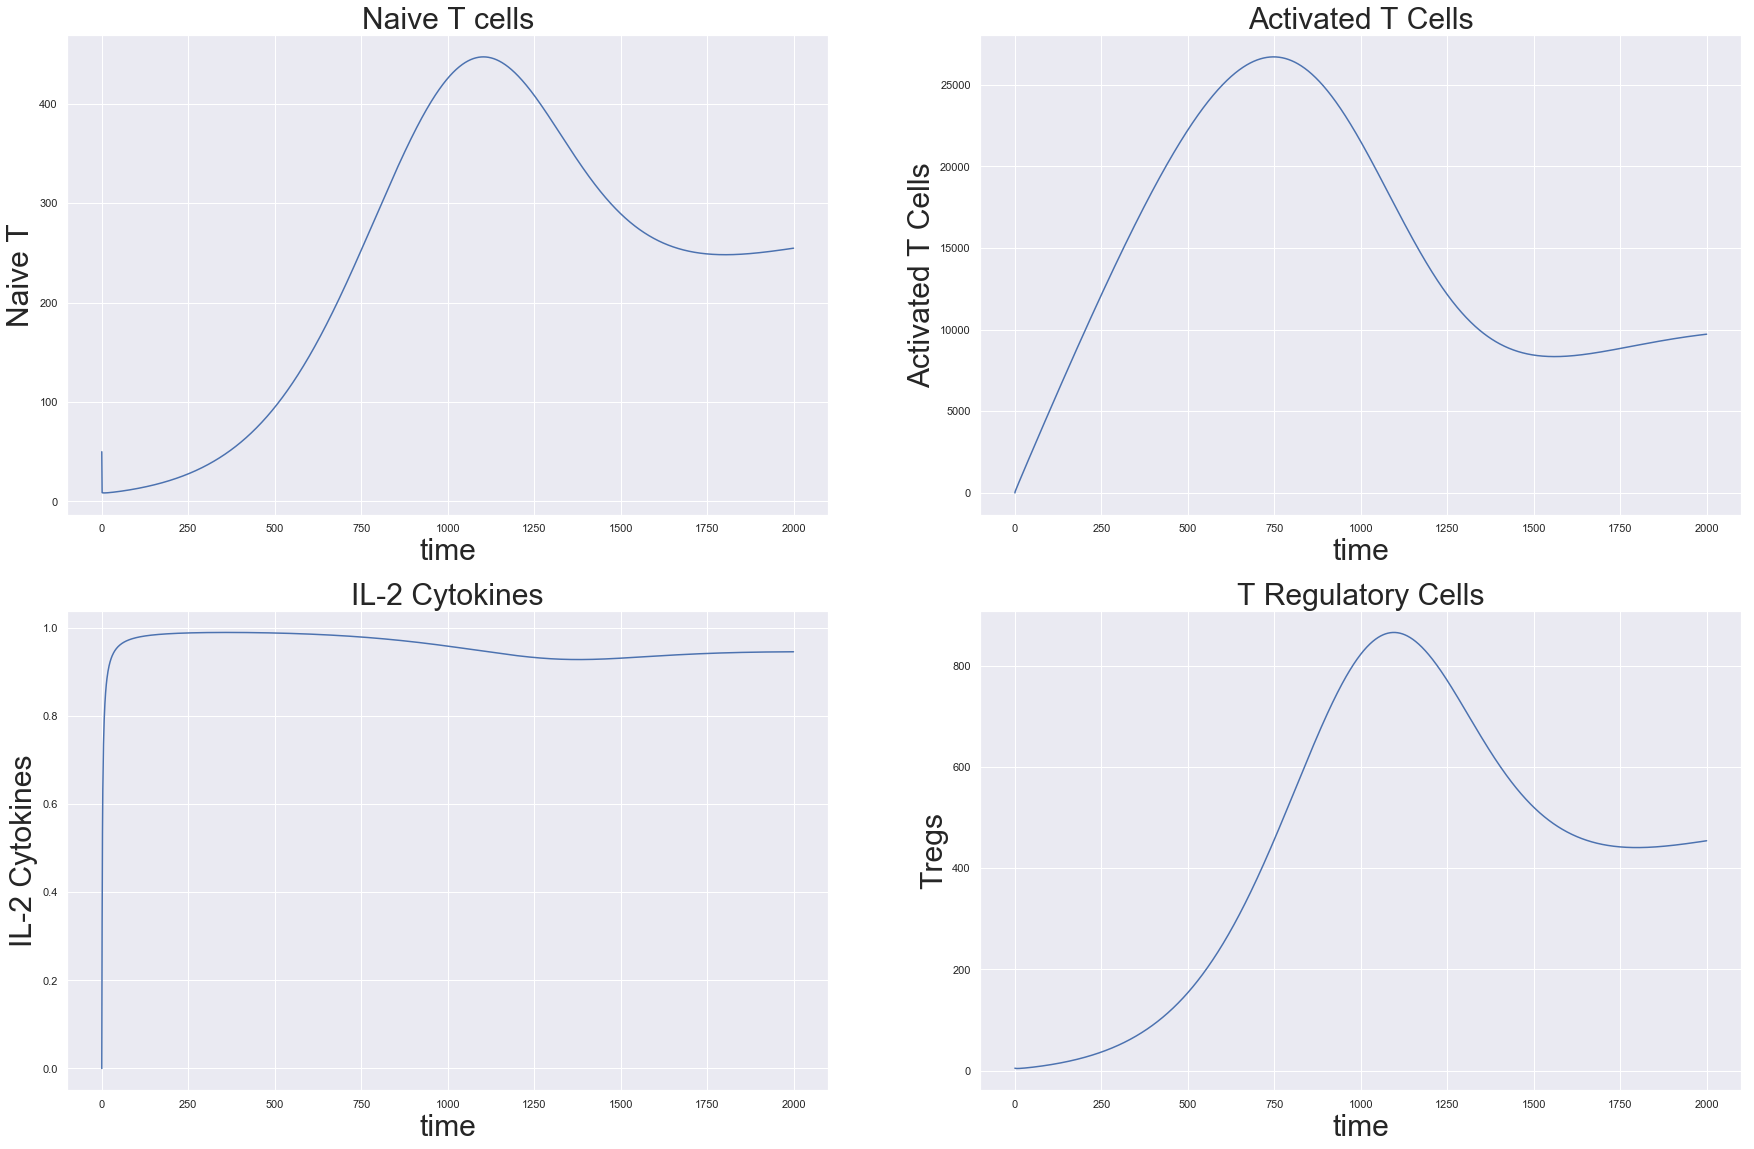

In [7]:
#Constants are saved in a array that is fed to the odeint function
co = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, d, e_T, e_R, f,kA,n]

# time points
#t = np.linspace(0,10)
numTime = 2000;
t = np.linspace(0,2000,num=numTime,endpoint=True)

# initial condition # ic0 = [N,T,I,R]
ic0 = [50,0,0,5]

# solve ODE
dyn = odeint(modelNew,ic0,t, args=(co,))

#Converting all values to a dataframe
Cells = pd.DataFrame(dyn, columns = ['N', 'T', 'I', 'R'])
Cells['time'] = t
#RsteadyStates
Cells['Rsteady'] = Cells.apply(lambda x: RSteadyState(x['N'], x['I']), axis=1)
#N Steady State
Cells['Nsteady'] = Cells.apply(lambda x: NSteadyState(x['R']), axis=1)
#T Steady State
Cells['Tsteady'] = Cells.apply(lambda x: TSteadyState(x['N'], x['I'], x['R']), axis=1)
#IL-2 Steady State
Cells['Isteady'] = Cells.apply(lambda x: ISteadyState(x['T'], x['R']), axis=1)

fig = PLT.figure(figsize=(30,30))
#Naive
ax1 = fig.add_subplot(321)
ax1.plot(Cells['time'],Cells['N'] , 'b-')
ax1.set_xlabel('time', fontsize = 30)
ax1.set_ylabel('Naive T', fontsize = 30)
ax1.set_title('Naive T cells', fontsize = 30)

# T
ax2 = fig.add_subplot(322)
ax2.plot(Cells['time'],Cells['T'],'b-')
ax2.set_xlabel('time', fontsize = 30)
ax2.set_ylabel('Activated T Cells', fontsize = 30)
ax2.set_title('Activated T Cells', fontsize = 30)

# Tregs
ax4 = fig.add_subplot(324)
ax4.plot(Cells['time'],Cells['R'],'b-')
ax4.set_xlabel('time', fontsize = 30)
ax4.set_ylabel('Tregs', fontsize = 30)
ax4.set_title('T Regulatory Cells', fontsize = 30)

# IL-2
ax3 = fig.add_subplot(323)
ax3.plot(Cells['time'],Cells['I'],'b-')
ax3.set_xlabel('time', fontsize = 30)
ax3.set_ylabel('IL-2 Cytokines', fontsize = 30)
ax3.set_title('IL-2 Cytokines', fontsize = 30)

PLT.show()

# Here is where we do the IL-2 KO Version

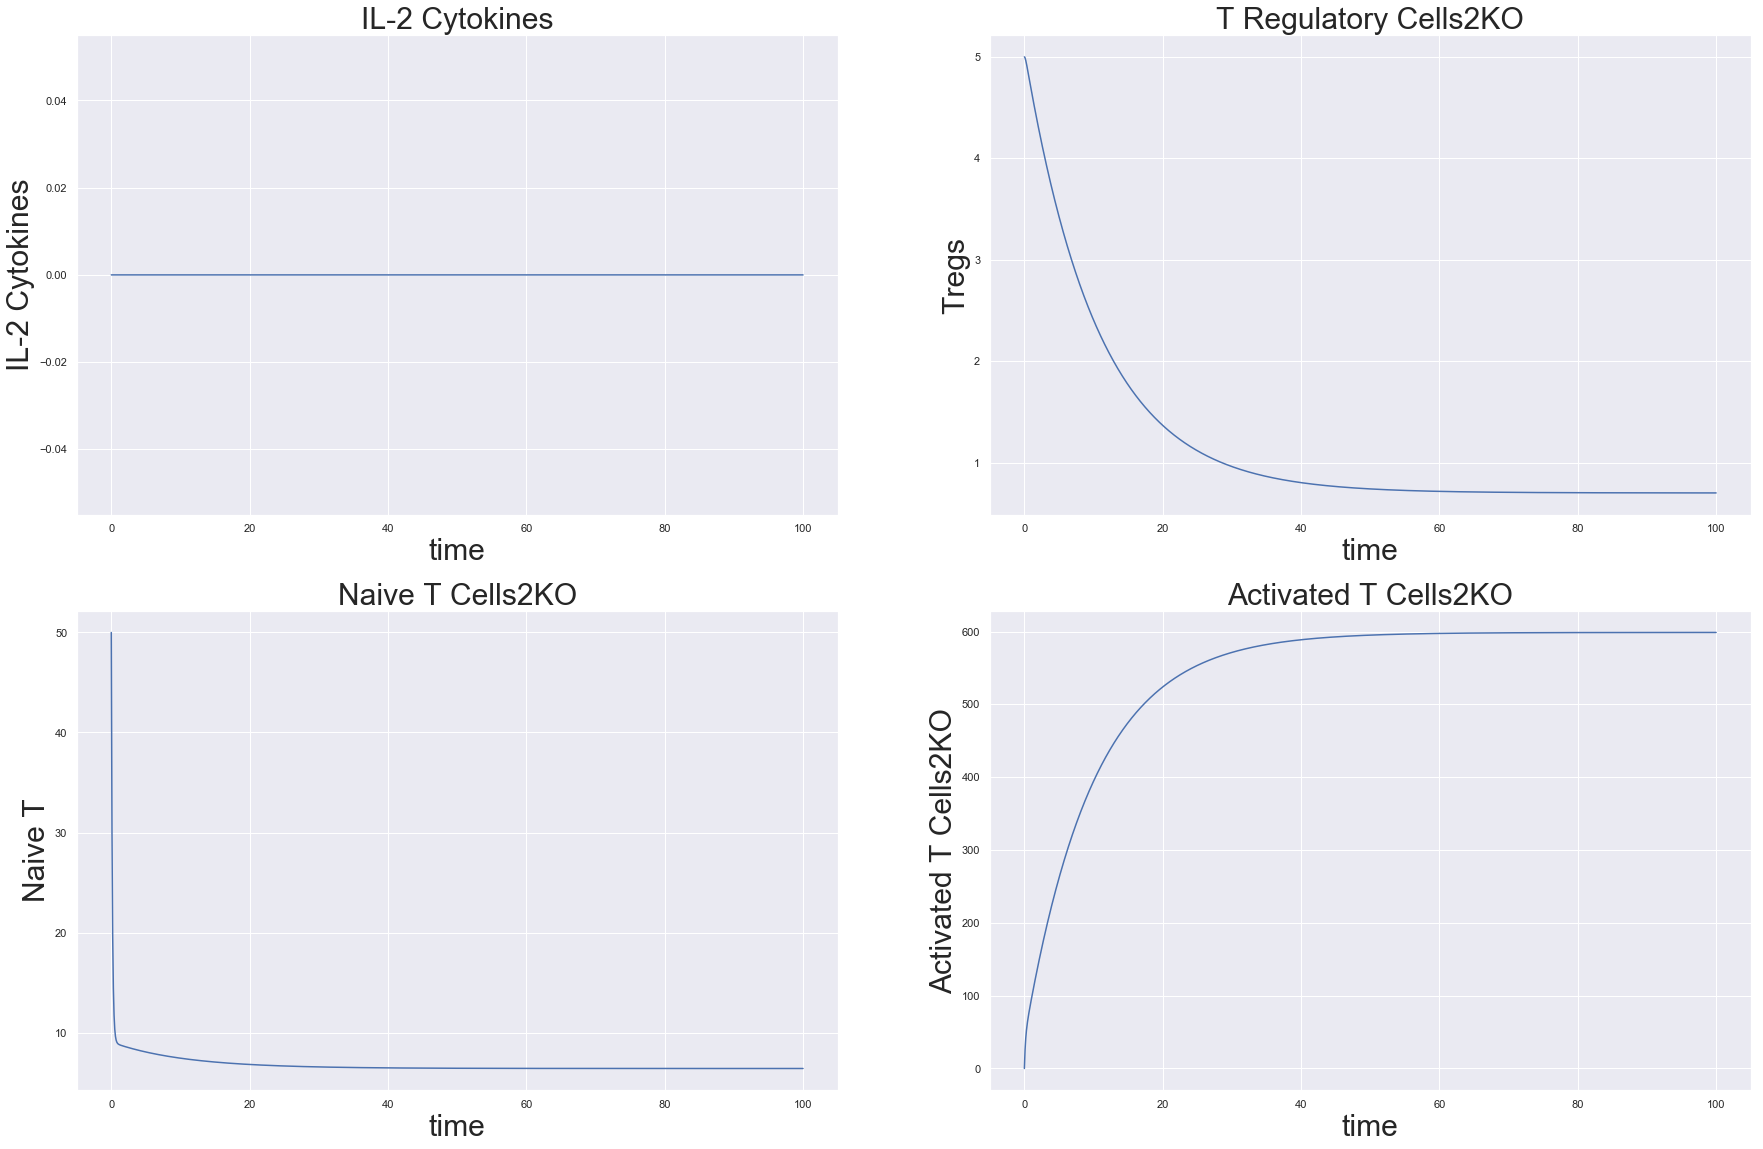

In [8]:
#Constants are saved in a array that is fed to the odeint function
co = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, 0, e_T, e_R, f,kA,n]

# time points
#t = np.linspace(0,10)
numTime = 2000;
t = np.linspace(0,100,num=numTime,endpoint=True)

# initial condition # ic0 = [N,T,I,R]
ic0 = [50,0,0,5]

# solve ODE
dyn2 = odeint(modelNew,ic0,t, args=(co,))

#Converting all values to a dataframe
Cells2KO = pd.DataFrame(dyn2, columns = ['N', 'T', 'I', 'R'])
Cells2KO['time'] = t
#RsteadyStates
Cells2KO['Rsteady'] = Cells2KO.apply(lambda x: RSteadyState(x['N'], x['I']), axis=1)
#N Steady State
Cells2KO['Nsteady'] = Cells2KO.apply(lambda x: NSteadyState(x['R']), axis=1)
#T Steady State
Cells2KO['Tsteady'] = Cells2KO.apply(lambda x: TSteadyState(x['N'], x['I'], x['R']), axis=1)
#IL-2 Steady State
Cells2KO['Isteady'] = Cells2KO.apply(lambda x: ISteadyState(x['T'], x['R']), axis=1)

fig = PLT.figure(figsize=(30,30))

#Naive
ax1 = fig.add_subplot(323)
ax1.plot(Cells2KO['time'],Cells2KO['N'] , 'b-')
ax1.set_xlabel('time', fontsize = 30)
ax1.set_ylabel('Naive T', fontsize = 30)
ax1.set_title('Naive T Cells2KO', fontsize = 30)

# T
ax2 = fig.add_subplot(324)
ax2.plot(Cells2KO['time'],Cells2KO['T'],'b-')
ax2.set_xlabel('time', fontsize = 30)
ax2.set_ylabel('Activated T Cells2KO', fontsize = 30)
ax2.set_title('Activated T Cells2KO', fontsize = 30)

# Tregs
ax4 = fig.add_subplot(322)
ax4.plot(Cells2KO['time'],Cells2KO['R'],'b-')
ax4.set_xlabel('time', fontsize = 30)
ax4.set_ylabel('Tregs', fontsize = 30)
ax4.set_title('T Regulatory Cells2KO', fontsize = 30)

# IL-2
ax3 = fig.add_subplot(321)
ax3.plot(Cells2KO['time'],Cells2KO['I'],'b-')
ax3.set_xlabel('time', fontsize = 30)
ax3.set_ylabel('IL-2 Cytokines', fontsize = 30)
ax3.set_title('IL-2 Cytokines', fontsize = 30)

PLT.show()

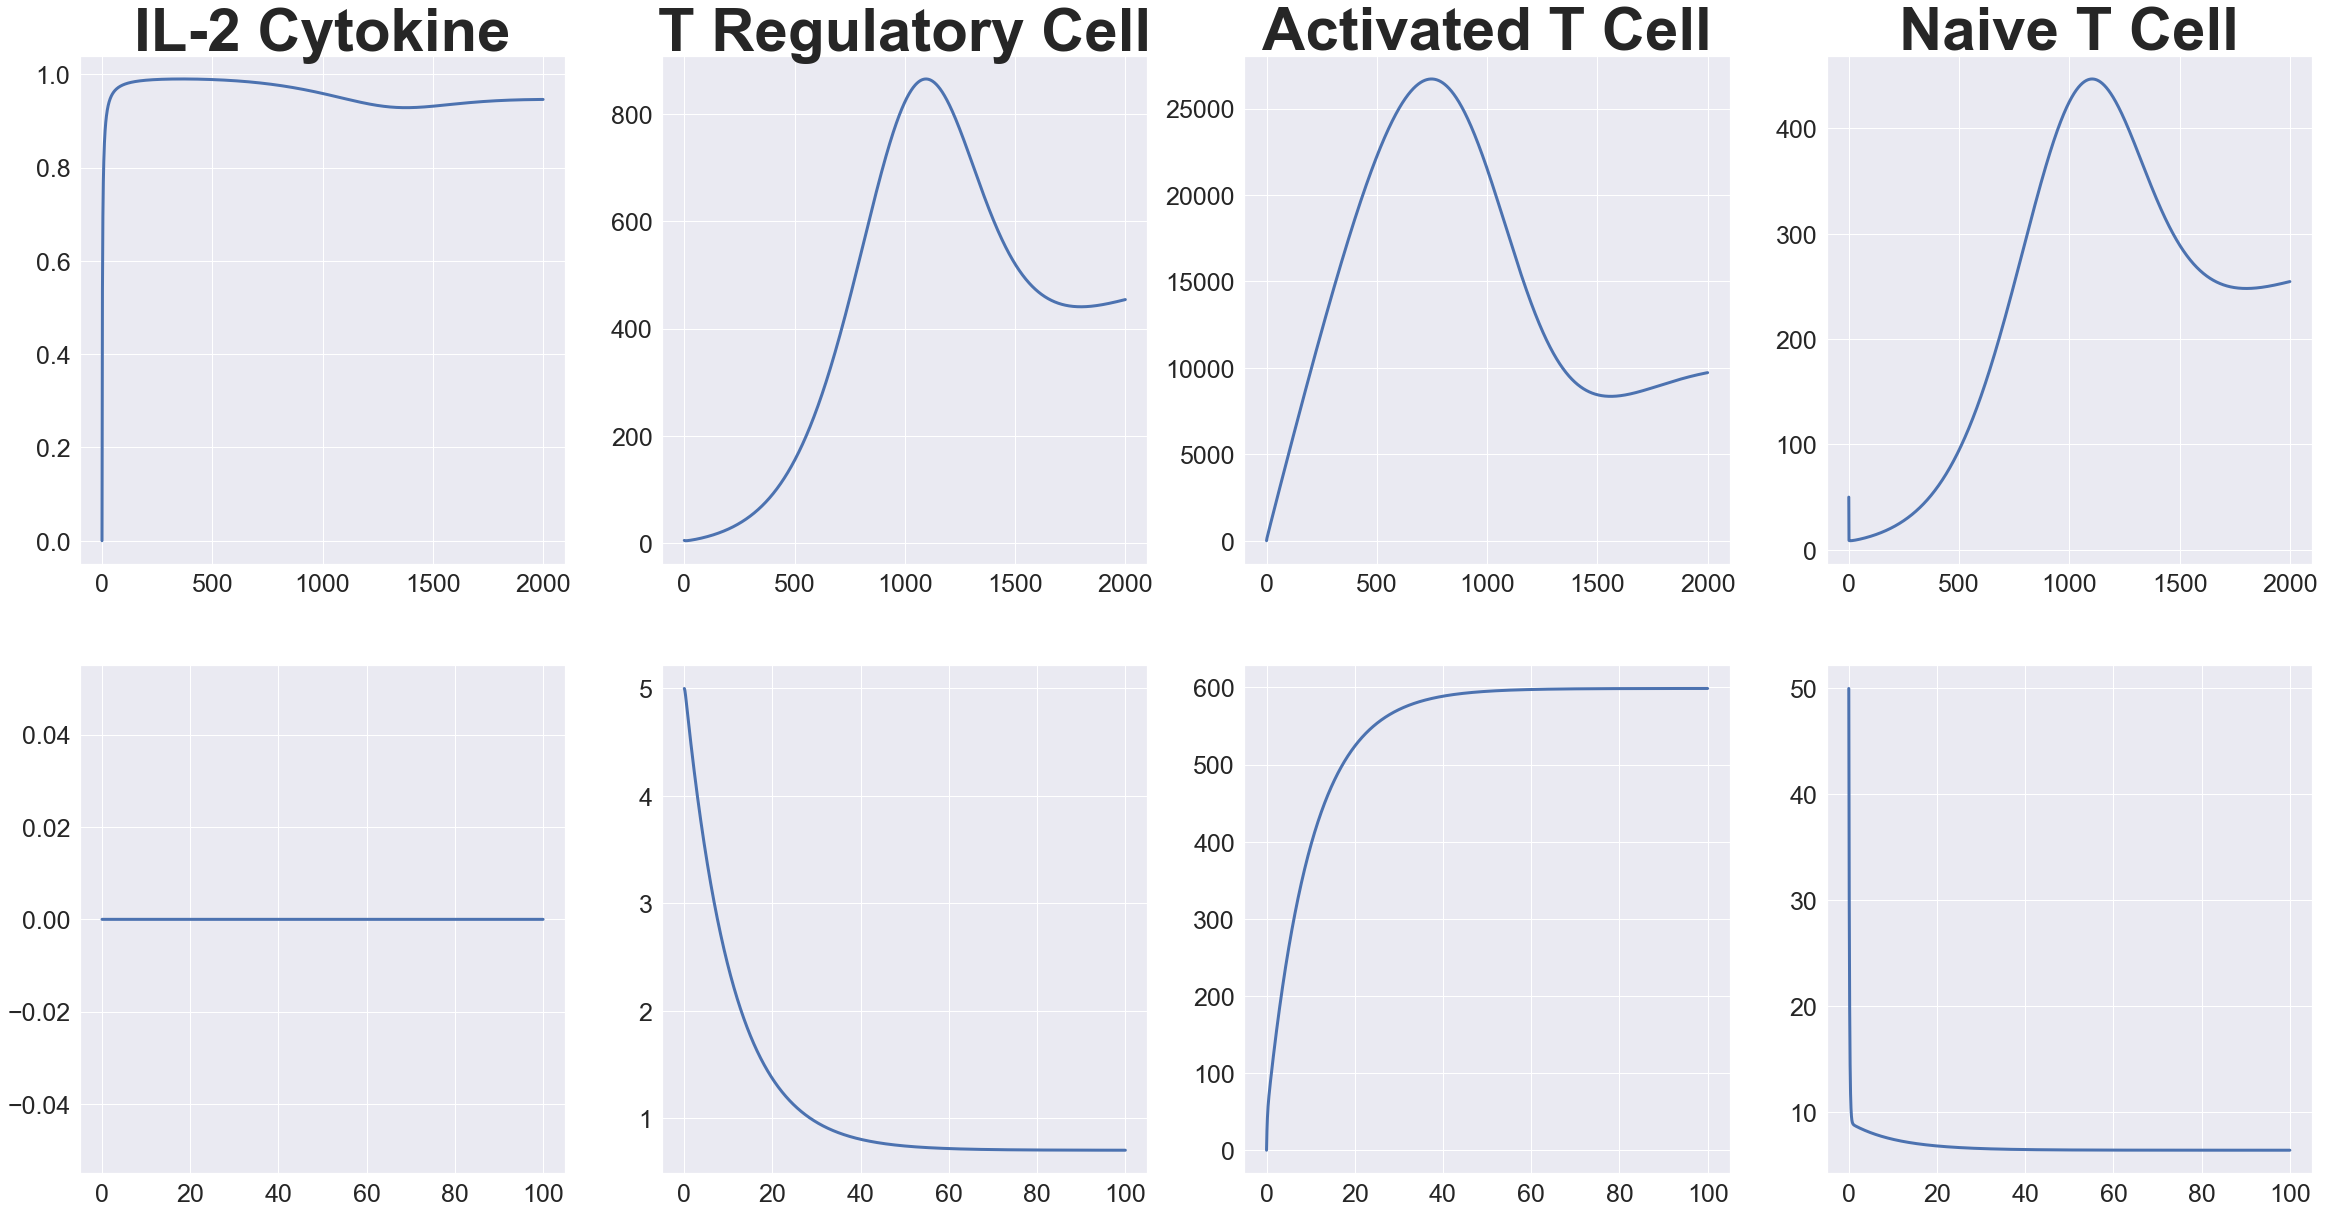

In [9]:
fig = PLT.figure(figsize=(40,22))

###########
#       WT
###########

# IL-2
ax3 = fig.add_subplot(441)
ax3.plot(Cells['time'],Cells['I'],'b-', linewidth=3)
# ax3.set_xlabel('time', fontsize = 30)
# ax3.set_ylabel('Population Size', fontsize = 30, fontweight='bold')
ax3.set_title('IL-2 Cytokine', fontsize = 60, fontweight='bold')
ax3.tick_params(axis="x", labelsize=25)
ax3.tick_params(axis="y", labelsize=25)

# Tregs
ax4 = fig.add_subplot(442)
ax4.plot(Cells['time'],Cells['R'],'b-', linewidth=3)
# ax4.set_xlabel('time', fontsize = 30)
# ax4.set_ylabel('Tregs', fontsize = 30)
ax4.set_title('T Regulatory Cell', fontsize = 60, fontweight='bold')
ax4.tick_params(axis="x", labelsize=25)
ax4.tick_params(axis="y", labelsize=25)

#Naive
ax1 = fig.add_subplot(444)
ax1.plot(Cells['time'],Cells['N'] , 'b-', linewidth=3)
# ax1.set_xlabel('time', fontsize = 30)
# ax1.set_ylabel('Naive T', fontsize = 30)
ax1.set_title('Naive T Cell', fontsize = 60, fontweight='bold')
ax1.tick_params(axis="x", labelsize=25)
ax1.tick_params(axis="y", labelsize=25)

# T
ax2 = fig.add_subplot(443)
ax2.plot(Cells['time'],Cells['T'],'b-', linewidth=3)
# ax2.set_xlabel('time', fontsize = 30)
# ax2.set_ylabel('Activated T Cells', fontsize = 30)
ax2.set_title('Activated T Cell', fontsize = 60, fontweight='bold')
ax2.tick_params(axis="x", labelsize=25)
ax2.tick_params(axis="y", labelsize=25)

###########
#       KO
###########

# IL-2
ax3KO = fig.add_subplot(445)
ax3KO.plot(Cells2KO['time'],Cells2KO['I'],'b-', linewidth=3)
# ax3KO.set_xlabel('Time', fontsize = 30)
# ax3KO.set_ylabel('Population Size', fontsize = 30, fontweight='bold')
# ax3KO.set_title('IL-2 Cytokine Count', fontsize = 30)
ax3KO.tick_params(axis="x", labelsize=25)
ax3KO.tick_params(axis="y", labelsize=25)

# Tregs
ax4KO = fig.add_subplot(446)
ax4KO.plot(Cells2KO['time'],Cells2KO['R'],'b-', linewidth=3)
# ax4KO.set_xlabel('Time', fontsize = 30)
# ax4KO.set_ylabel('Tregs', fontsize = 30)
# ax4KO.set_title('T Regulatory Cells2KO', fontsize = 30)
ax4KO.tick_params(axis="x", labelsize=25)
ax4KO.tick_params(axis="y", labelsize=25)

#Naive
ax1KO = fig.add_subplot(448)
ax1KO.plot(Cells2KO['time'],Cells2KO['N'] , 'b-', linewidth=3)
# ax1KO.set_xlabel('Time', fontsize = 30)
# ax1KO.set_ylabel('Naive T', fontsize = 30)
# ax1KO.set_title('Naive T Cells2KO', fontsize = 30)
ax1KO.tick_params(axis="x", labelsize=25)
ax1KO.tick_params(axis="y", labelsize=25)


# T
ax2KO = fig.add_subplot(447)
ax2KO.plot(Cells2KO['time'],Cells2KO['T'],'b-', linewidth=3)
# ax2KO.set_xlabel('Time', fontsize = 30)
# ax2KO.set_ylabel('Activated T Cells2KO', fontsize = 30)
# ax2KO.set_title('Activated T Cells2KO', fontsize = 30)
ax2KO.tick_params(axis="x", labelsize=25)
ax2KO.tick_params(axis="y", labelsize=25)


fig.subplots_adjust(top = 1.6)
PLT.show()

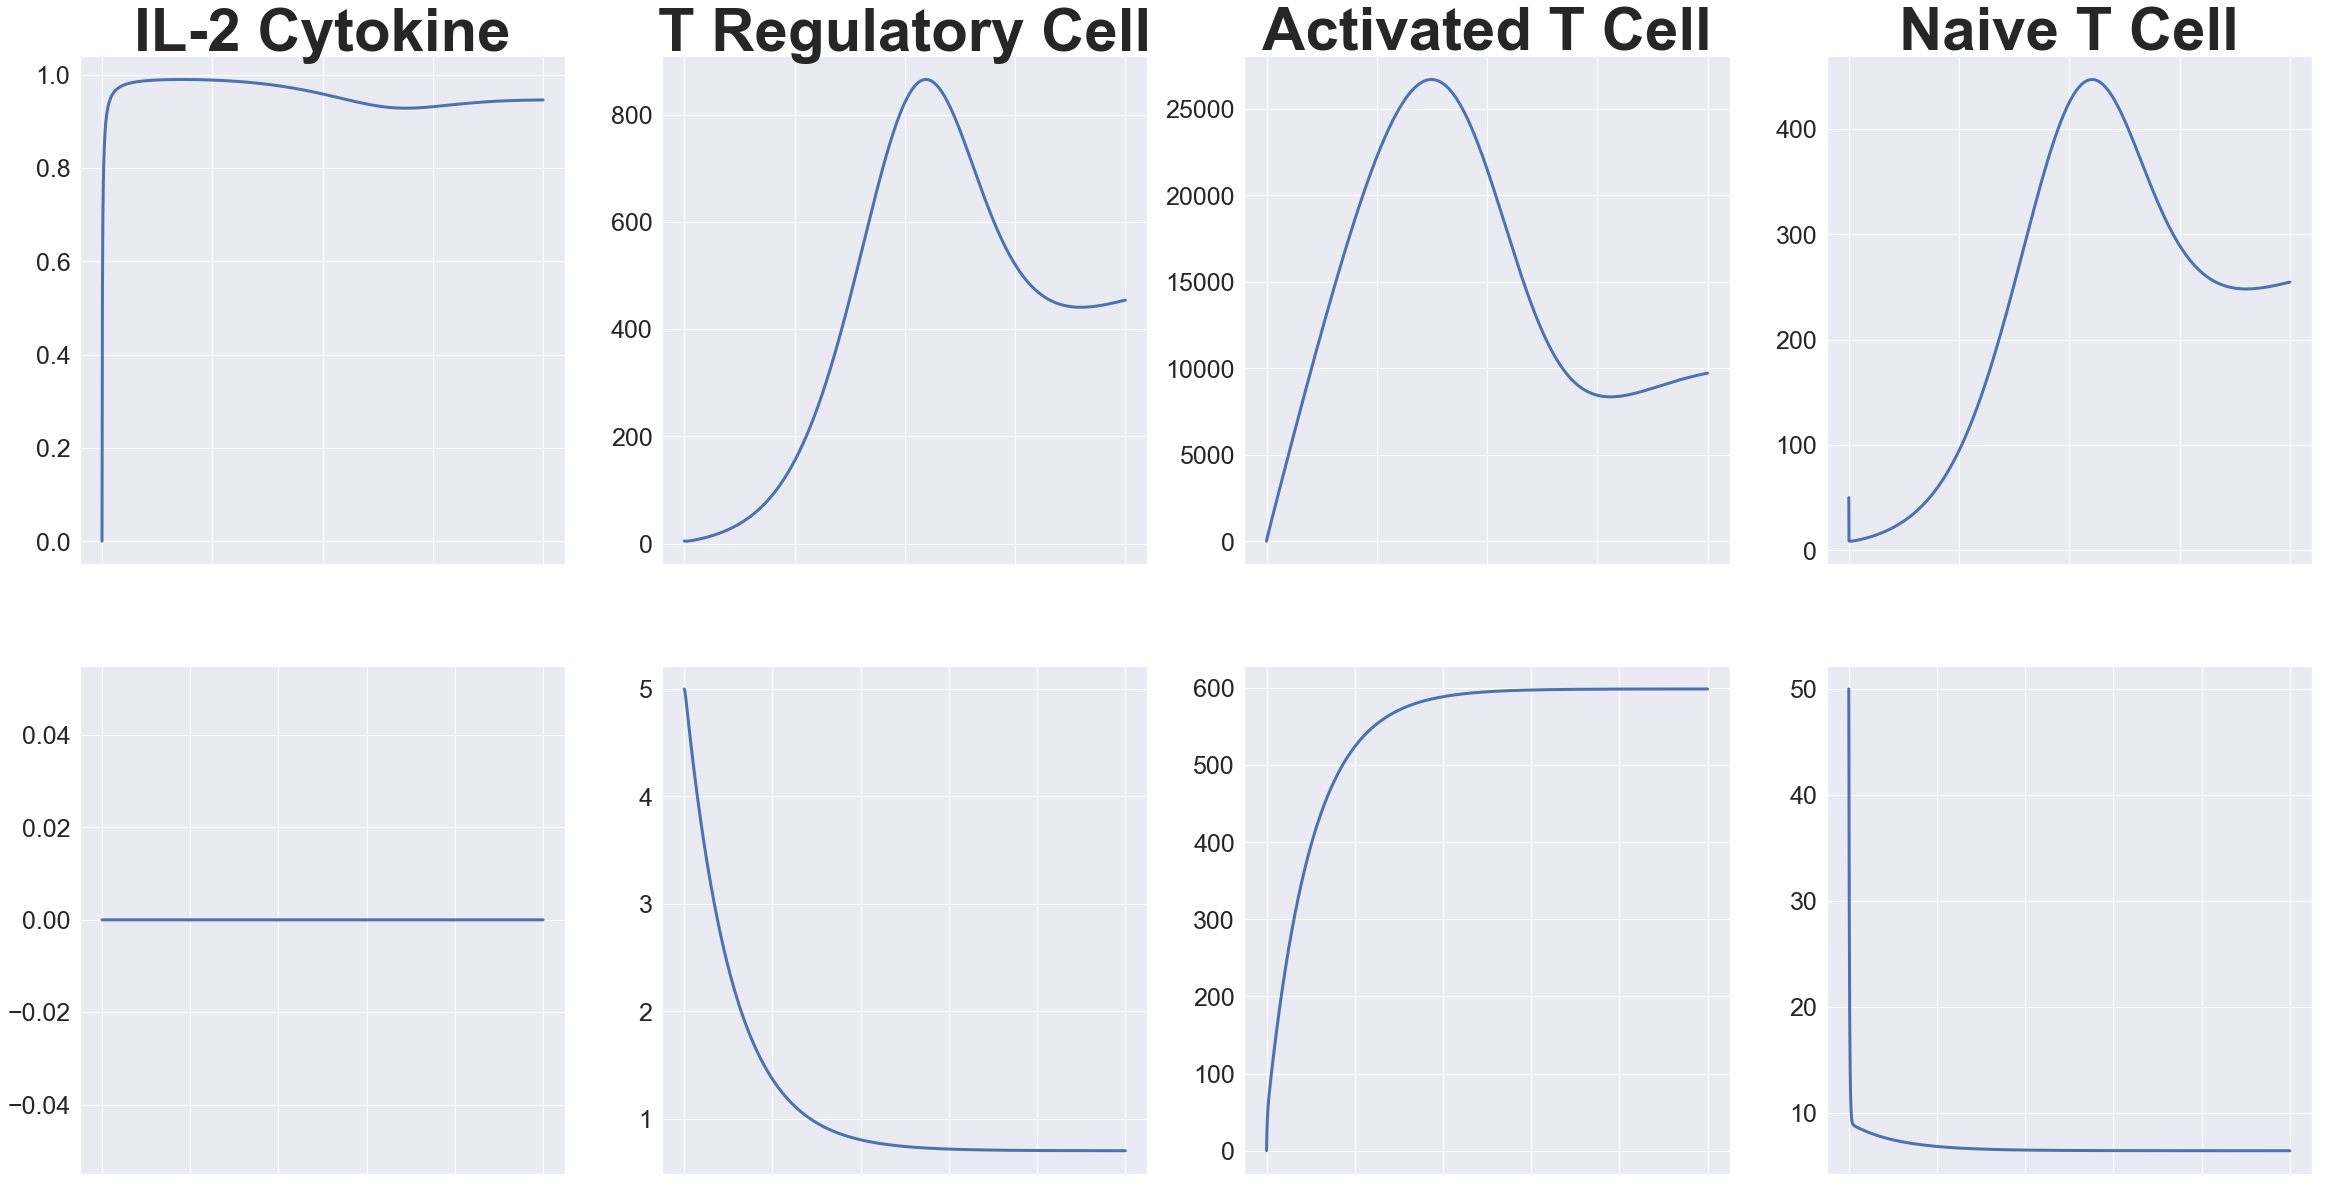

In [22]:
fig = PLT.figure(figsize=(40,22))

###########
#       WT
###########

# IL-2
ax3 = fig.add_subplot(441)
ax3.plot(Cells['time'],Cells['I'],'b-', linewidth=3)
# ax3.set_xlabel('time', fontsize = 30)
# ax3.set_ylabel('Population Size', fontsize = 30, fontweight='bold')
ax3.set_title('IL-2 Cytokine', fontsize = 60, fontweight='bold')
ax3.tick_params(axis="x", labelsize=25)
ax3.tick_params(axis="y", labelsize=25)
ax3.set_xticklabels([])

# Tregs
ax4 = fig.add_subplot(442)
ax4.plot(Cells['time'],Cells['R'],'b-', linewidth=3)
# ax4.set_xlabel('time', fontsize = 30)
# ax4.set_ylabel('Tregs', fontsize = 30)
ax4.set_title('T Regulatory Cell', fontsize = 60, fontweight='bold')
ax4.tick_params(axis="x", labelsize=25)
ax4.tick_params(axis="y", labelsize=25)
ax4.set_xticklabels([])

#Naive
ax1 = fig.add_subplot(444)
ax1.plot(Cells['time'],Cells['N'] , 'b-', linewidth=3)
# ax1.set_xlabel('time', fontsize = 30)
# ax1.set_ylabel('Naive T', fontsize = 30)
ax1.set_title('Naive T Cell', fontsize = 60, fontweight='bold')
ax1.tick_params(axis="x", labelsize=25)
ax1.tick_params(axis="y", labelsize=25)
ax1.set_xticklabels([])

# T
ax2 = fig.add_subplot(443)
ax2.plot(Cells['time'],Cells['T'],'b-', linewidth=3)
# ax2.set_xlabel('time', fontsize = 30)
# ax2.set_ylabel('Activated T Cells', fontsize = 30)
ax2.set_title('Activated T Cell', fontsize = 60, fontweight='bold')
ax2.tick_params(axis="x", labelsize=25)
ax2.tick_params(axis="y", labelsize=25)
ax2.set_xticklabels([])

###########
#       KO
###########

# IL-2
ax3KO = fig.add_subplot(445)
ax3KO.plot(Cells2KO['time'],Cells2KO['I'],'b-', linewidth=3)
# ax3KO.set_xlabel('Time', fontsize = 30)
# ax3KO.set_ylabel('Population Size', fontsize = 30, fontweight='bold')
# ax3KO.set_title('IL-2 Cytokine Count', fontsize = 30)
ax3KO.tick_params(axis="x", labelsize=25)
ax3KO.tick_params(axis="y", labelsize=25)
ax3KO.set_xticklabels([])

# Tregs
ax4KO = fig.add_subplot(446)
ax4KO.plot(Cells2KO['time'],Cells2KO['R'],'b-', linewidth=3)
# ax4KO.set_xlabel('Time', fontsize = 30)
# ax4KO.set_ylabel('Tregs', fontsize = 30)
# ax4KO.set_title('T Regulatory Cells2KO', fontsize = 30)
ax4KO.tick_params(axis="x", labelsize=25)
ax4KO.tick_params(axis="y", labelsize=25)
ax4KO.set_xticklabels([])

#Naive
ax1KO = fig.add_subplot(448)
ax1KO.plot(Cells2KO['time'],Cells2KO['N'] , 'b-', linewidth=3)
# ax1KO.set_xlabel('Time', fontsize = 30)
# ax1KO.set_ylabel('Naive T', fontsize = 30)
# ax1KO.set_title('Naive T Cells2KO', fontsize = 30)
ax1KO.tick_params(axis="x", labelsize=25)
ax1KO.tick_params(axis="y", labelsize=25)
ax1KO.set_xticklabels([])

# T
ax2KO = fig.add_subplot(447)
ax2KO.plot(Cells2KO['time'],Cells2KO['T'],'b-', linewidth=3)
# ax2KO.set_xlabel('Time', fontsize = 30)
# ax2KO.set_ylabel('Activated T Cells2KO', fontsize = 30)
# ax2KO.set_title('Activated T Cells2KO', fontsize = 30)
# ax2KO.tick_params(axis="x", labelsize=25)
ax2KO.tick_params(axis="y", labelsize=25)
ax2KO.set_xticklabels([])

fig.subplots_adjust(top = 1.6)
PLT.show()